In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

In [2]:
# Non-linear regression data
X = np.linspace(-3, 3, 40).reshape(-1, 1)
y = np.sin(X).ravel()

Text(0.5, 1.0, 'Visulization of Raw data ')

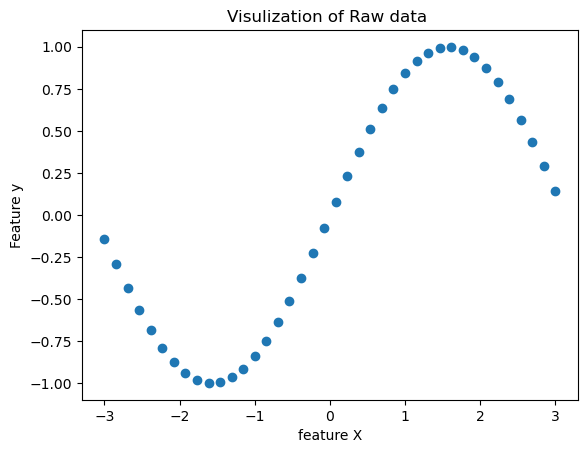

In [7]:
plt.scatter(X,y)
plt.xlabel("feature X")
plt.ylabel("Feature y")
plt.title("Visulization of Raw data ")

# RBF kernel 

In [8]:
def rbf_kernel(x, z, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x - z)**2)

In [9]:
class KernelSVR:
    def __init__(self, C=1.0, epsilon=0.1, gamma=0.5, lr=0.01, epochs=200):
        self.C = C
        self.epsilon = epsilon
        self.gamma = gamma
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.X = X
        self.y = y
        n = len(X)

        self.alpha = np.zeros(n)
        self.alpha_star = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            for i in range(n):
                f_x = sum(
                    (self.alpha[j] - self.alpha_star[j]) *
                    rbf_kernel(self.X[j], X[i], self.gamma)
                    for j in range(n)
                ) + self.b

                error = y[i] - f_x

                if error > self.epsilon:
                    self.alpha[i] = min(self.alpha[i] + self.lr, self.C)
                elif error < -self.epsilon:
                    self.alpha_star[i] = min(self.alpha_star[i] + self.lr, self.C)

    def predict(self, X_test):
        preds = []
        for x in X_test:
            val = sum(
                (self.alpha[i] - self.alpha_star[i]) *
                rbf_kernel(self.X[i], x, self.gamma)
                for i in range(len(self.X))
            ) + self.b
            preds.append(val)
        return np.array(preds)

# Traint the model

In [10]:
svr = KernelSVR(C=5, epsilon=0.1, gamma=1)
svr.fit(X, y)

y_pred = svr.predict(X)

# Visulization Of E-tube 

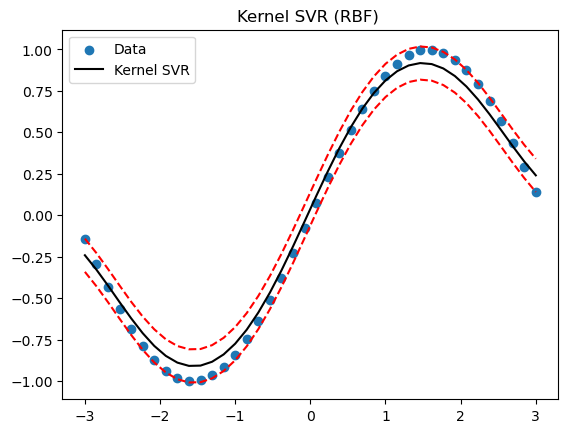

In [12]:
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="black", label="Kernel SVR")
plt.plot(X, y_pred + svr.epsilon, "--", color="red")
plt.plot(X, y_pred - svr.epsilon, "--", color="red")

plt.legend()
plt.title("Kernel SVR (RBF) ")
plt.show()

In [13]:
epsilon = svr.epsilon

# Indices of support vectors
support_vector_idx = np.where(np.abs(y - y_pred) >= epsilon)[0]

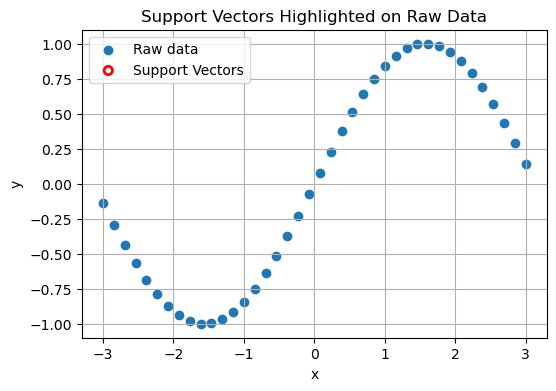

In [14]:
plt.figure(figsize=(6,4))

# All raw data points
plt.scatter(X, y, label="Raw data")

# Highlight support vectors
plt.scatter(
    X[support_vector_idx],
    y[support_vector_idx],
    facecolors='none',
    edgecolors='red',
    linewidths=2,
    label="Support Vectors"
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vectors Highlighted on Raw Data")
plt.legend()
plt.grid(True)
plt.show()
